# Visualisation of Clustering Results

**Objective:** 

 - load clustering results
 - produce visualisations

In [1]:
%%time

# start Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("Visualisation").getOrCreate()
spark

CPU times: user 45.7 ms, sys: 40.9 ms, total: 86.6 ms
Wall time: 9.68 s


## Tokens cloud

In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import wordcloud as wdcld

In [3]:
cluster_tokens = spark.read.json("cluster_tokens.json")
pd_cluster_tokens = cluster_tokens.toPandas()
pd_cluster_tokens

,cluster_tokens,n_unique_mess,prediction,tf_idf,token_freq
0,"[transfer, globus_xio, unable, connect, $ADDRE...",123,8,"([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...","([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13..."
1,"[destination, srm_putdone, error, surl, $URL, ...",62,2,"([0, 2, 3, 4, 5, 6, 7, 12, 14, 15, 16, 25, 26,...","([0, 2, 3, 4, 5, 6, 7, 12, 14, 15, 16, 25, 26,..."
2,"[source, checksum, globus_ftp_client, server, ...",74,3,"([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 1...","([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 1..."
3,"[transfer, globus_ftp_client, server, responde...",65,0,"([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...","([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
4,"[srm-ifce, err, communication, error, send, er...",31,7,"([0, 1, 3, 4, 5, 6, 7, 10, 11, 14, 17, 18, 23,...","([0, 1, 3, 4, 5, 6, 7, 10, 11, 14, 17, 18, 23,..."
5,"[transfer, globus_ftp_client, server, responde...",60,4,"([0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 19, ...","([0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 19, ..."
6,"[destination, checksum, srm-ifce, err, communi...",52,9,"([0, 3, 8, 9, 10, 11, 12, 14, 18, 20, 21, 23, ...","([0, 3, 8, 9, 10, 11, 12, 14, 18, 20, 21, 23, ..."
7,"[source, checksum, globus_ftp_client, server, ...",49,11,"([0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 17, 19, 2...","([0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 17, 19, 2..."
8,"[transfer, globus_ftp_client, server, responde...",24,1,"([0, 2, 4, 5, 6, 7, 10, 11, 22, 33, 40, 56, 70...","([0, 2, 4, 5, 6, 7, 10, 11, 22, 33, 40, 56, 70..."
9,"[destination, overwrite, error, reported, srm_...",16,10,"([0, 3, 10, 12, 14, 18, 20, 22, 23, 26, 27, 34...","([0, 3, 10, 12, 14, 18, 20, 22, 23, 26, 27, 34..."


In [4]:
descriptions = {8: "unknown error", 2: "storage database error", 3: "data node unreachable", 0: "storage server down", 7: "authentication problem",
                4: "storage configuration error", 9: "data centre network problem", 11: "data node unreachable",
                1: "data centre network problem", 10: "disk full or disk broken", 6: "storage server down", 5: "storage server down (spanish)"}

In [ ]:
import matplotlib
from matplotlib import pyplot as plt 
sns.set_context("paper", rc={"axes.titlesize":18,"axes.labelsize":22})   

for label, tokens in zip(pd_cluster_tokens.prediction, pd_cluster_tokens.cluster_tokens):
    # Create and generate a word cloud image:
    wordcloud = wdcld.WordCloud(width=1600, height=800, background_color="white", min_font_size=11, colormap=matplotlib.cm.inferno).generate(' '.join(tokens))

    # Display the generated image:
    fig = plt.figure(figsize=(12,6))
    plt.title("Cluster n. {}".format(label))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    fig.savefig("Cluster_n{}.png".format(label), format='png')

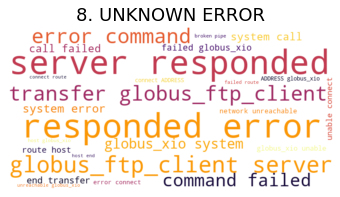

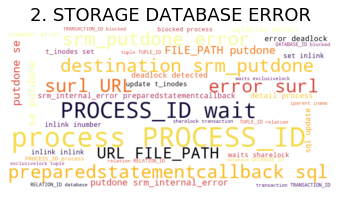

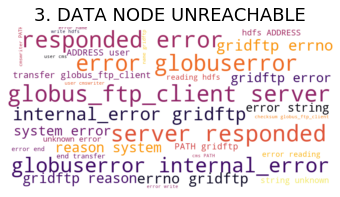

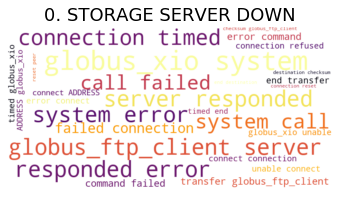

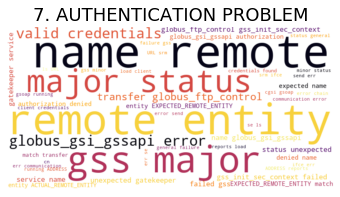

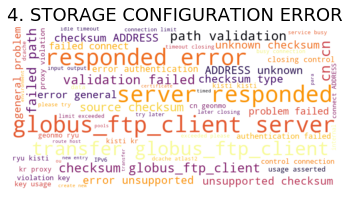

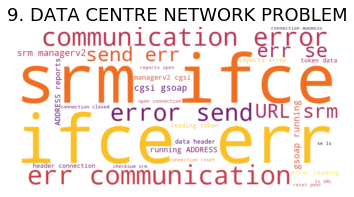

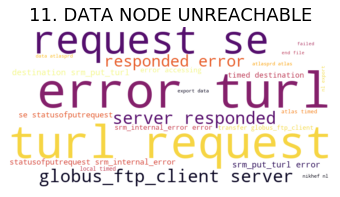

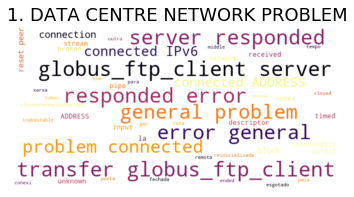

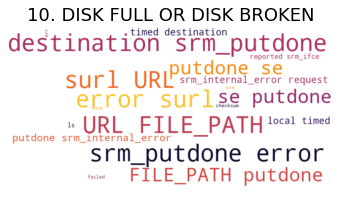

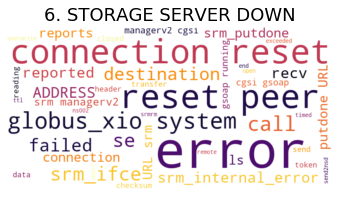

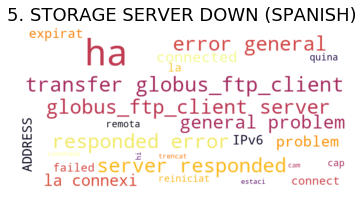

In [6]:
import matplotlib
from matplotlib import pyplot as plt 
sns.set_context("paper", rc={"axes.titlesize":18,"axes.labelsize":22})

for label, tokens in zip(pd_cluster_tokens.prediction, pd_cluster_tokens.cluster_tokens):
    # Create and generate a word cloud image:
    wordcloud = wdcld.WordCloud(width=800, height=400, background_color="white", min_font_size=11, colormap=matplotlib.cm.inferno).generate(' '.join(tokens))

    # Display the generated image:
    fig = plt.figure(figsize=(6,3))
    plt.title("{}. {}".format(label, descriptions[label].upper()))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    fig.savefig("results/clusters_with_description/Cluster_n{}_with_description.png".format(label), format='png', bbox_inches='tight')

## Tokens TF-IDF 

In [5]:
cluster_tokens.columns

['cluster_tokens', 'n_unique_mess', 'prediction', 'tf_idf', 'token_freq']

In [6]:
from pyspark.ml.feature import CountVectorizer, IDF

# count frequency of each token in each text (bag of words model)
count_vec = CountVectorizer(inputCol="cluster_tokens", outputCol="token_freq")
count_vec_model = count_vec.fit(cluster_tokens.select('cluster_tokens', 'n_unique_mess', 'prediction'))
tks_freq = count_vec_model.transform(cluster_tokens.select('cluster_tokens', 'n_unique_mess', 'prediction'))
idf = IDF(inputCol="token_freq", outputCol="tf_idf")
tks_freq = idf.fit(tks_freq).transform(tks_freq)
tks_freq.cache()
tks_freq.show()

+--------------------+-------------+----------+--------------------+--------------------+
|      cluster_tokens|n_unique_mess|prediction|          token_freq|              tf_idf|
+--------------------+-------------+----------+--------------------+--------------------+
|[transfer, globus...|          123|         8|(707,[0,1,2,3,4,5...|(707,[0,1,2,3,4,5...|
|[destination, srm...|           62|         2|(707,[0,2,3,4,5,6...|(707,[0,2,3,4,5,6...|
|[source, checksum...|           74|         3|(707,[0,1,2,3,4,5...|(707,[0,1,2,3,4,5...|
|[transfer, globus...|           65|         0|(707,[0,1,3,4,5,6...|(707,[0,1,3,4,5,6...|
|[srm-ifce, err, c...|           31|         7|(707,[0,1,3,4,5,6...|(707,[0,1,3,4,5,6...|
|[transfer, globus...|           60|         4|(707,[0,1,2,3,4,5...|(707,[0,1,2,3,4,5...|
|[destination, che...|           52|         9|(707,[0,3,8,9,10,...|(707,[0,3,8,9,10,...|
|[source, checksum...|           49|        11|(707,[0,1,2,3,4,5...|(707,[0,1,2,3,4,5...|
|[transfer

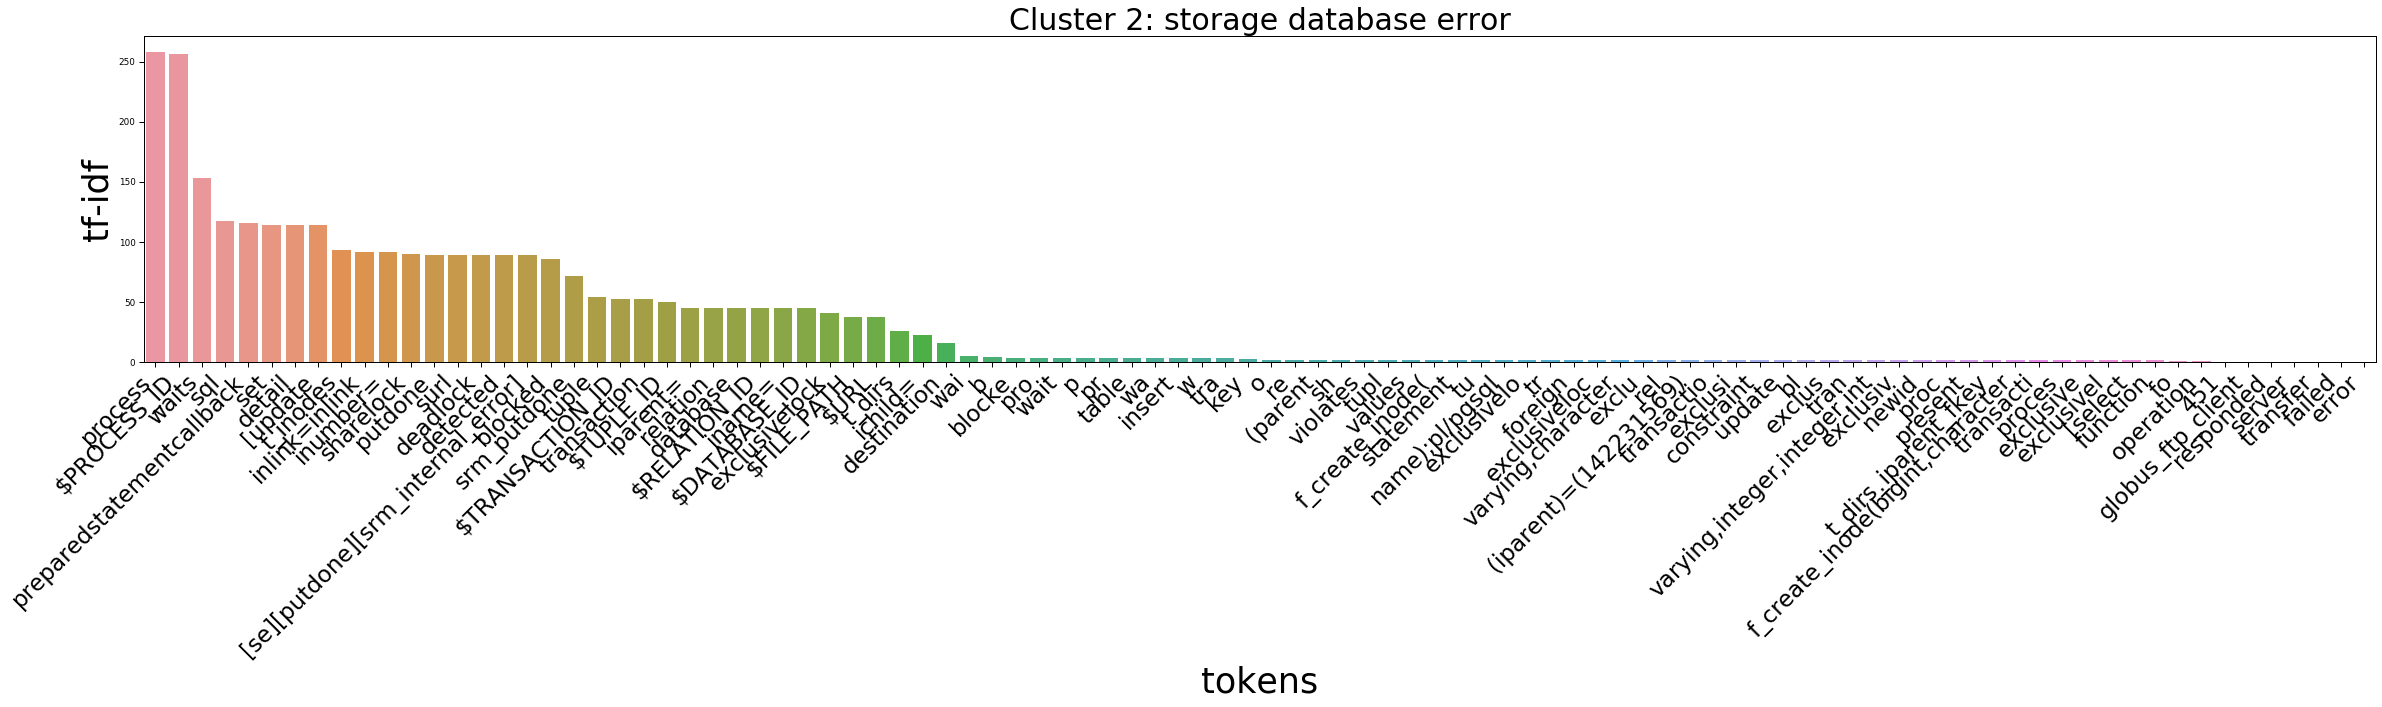

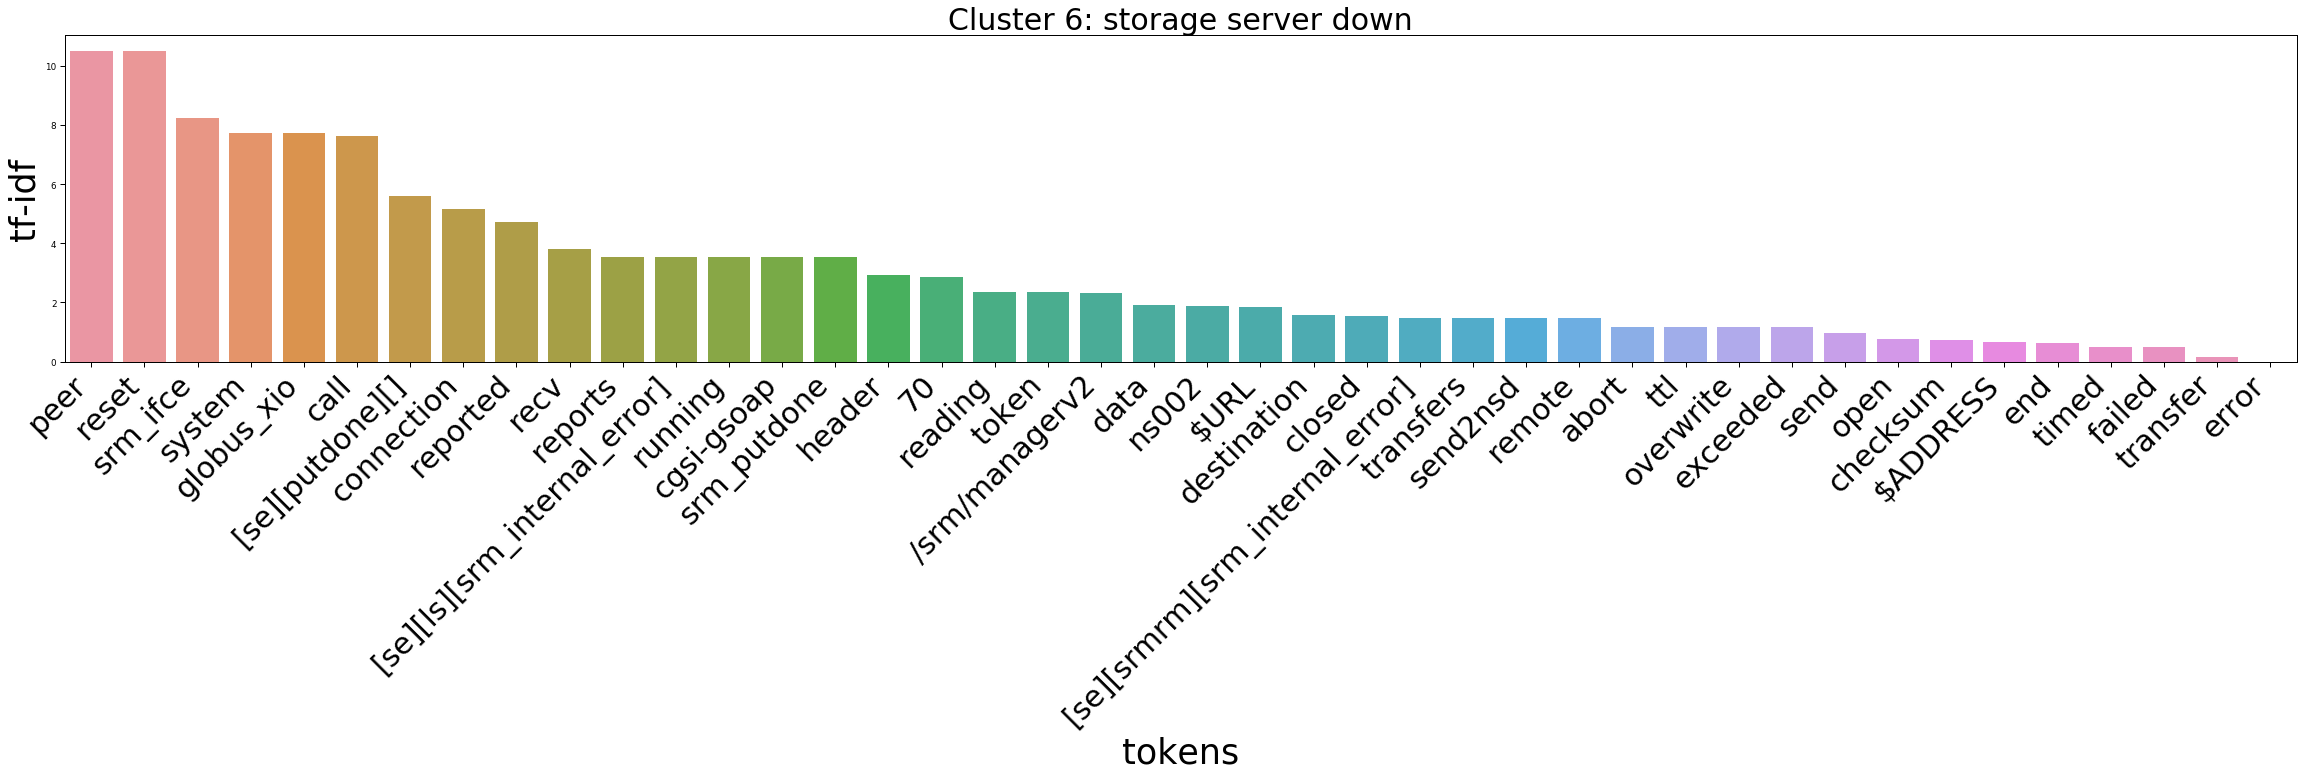

In [15]:
sns.set_context("paper", rc={"axes.titlesize":30,"axes.labelsize":35})   
for idx, row in enumerate(tks_freq.select("cluster_tokens","tf_idf", "prediction").collect()):
    
    if row[2] in [6,2]:

        # extract data
        y = row[1]
        x = [count_vec_model.vocabulary[x] for x in y.indices]#row[0]#.split()
        data = pd.DataFrame({"tokens": x,"tf-idf": y.values}).sort_values(by=['tf-idf'], ascending=False)
        if len(x)>100:
            font_size=18
            fig_size=(40,6)
        elif len(x)>50:
            font_size=23
            fig_size=(30,6)
        else:
            font_size=30
            fig_size=(30,6)
#         font_size=23
        fig_size=(40,6)
        fig, ax = plt.subplots(figsize=fig_size)
        _ = plt.title("Cluster {}: {}".format(row[2], descriptions[row[2]]))
        g = sns.barplot(ax=ax, x="tokens", y="tf-idf", data=data, )


        _ = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=font_size)
#     _ = plt.savefig("Cluster_{}.png".format(row[2]))